### Практическое задание

Попробуйте обучить нейронную сеть на Keras на Fashion-MNIST датасете. Опишите в комментарии к уроку - какой результата вы добились от нейросети? Что помогло вам улучшить ее точность?

### Подключение библиотек и скриптов

In [1300]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [1301]:
plt.rcParams.update({'font.size': 14})
pd.set_option('precision', 3)
pd.set_option('max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('max_colwidth', 300)

### Загрузка данных

In [1302]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

### Изучение датасета

In [1303]:
train_images.shape

(60000, 28, 28)

In [1304]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [1305]:
test_images.shape

(10000, 28, 28)

In [1306]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

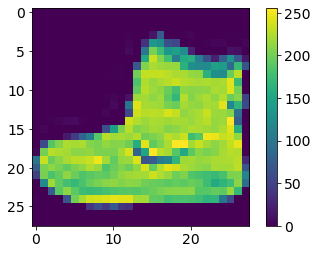

In [1307]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [1308]:
train_images = train_images / 255.0

test_images = test_images / 255.0

#### Train set images class distribution

In [1309]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

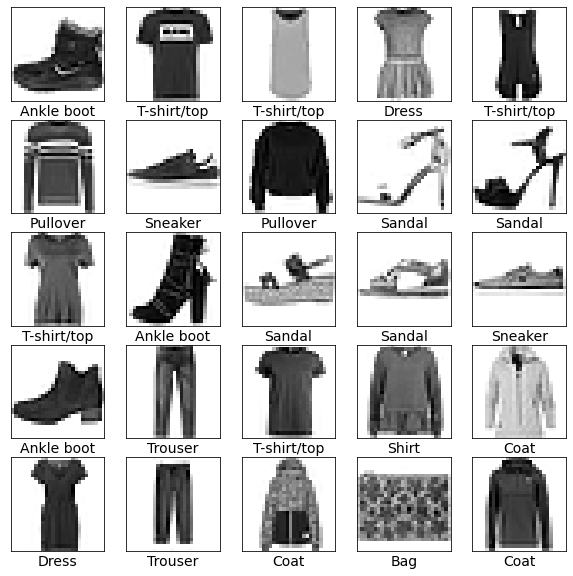

In [1310]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Model - 1

In [1311]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [1312]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [1313]:
history = model.fit(train_images, train_labels, verbose=1, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4948 - accuracy: 0.8261
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3726 - accuracy: 0.8656
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3346 - accuracy: 0.8792
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3093 - accuracy: 0.8857
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2918 - accuracy: 0.8928


In [1314]:
score = model.evaluate(train_images, train_labels, verbose=0)

In [1315]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2904019057750702
Test accuracy: 0.8925999999046326


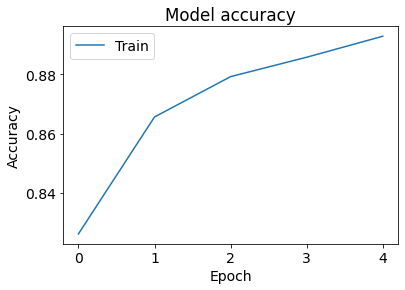

In [1316]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

### Model - 2

In [1317]:
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [1318]:
model2.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [1319]:
history = model2.fit(train_images, train_labels, epochs=50, verbose=1)

Epoch 1/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5007 - accuracy: 0.8240
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3779 - accuracy: 0.8642
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3405 - accuracy: 0.8758
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3146 - accuracy: 0.8848
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2987 - accuracy: 0.8903
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2828 - accuracy: 0.8958
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2709 - accuracy: 0.8984
Epoch 8/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2591 - accuracy: 0.9033
Epoch 9/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2493 - accuracy: 0.9069
Epoch 10/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.241

In [1320]:
score2 = model2.evaluate(train_images, train_labels, verbose=0)

In [1321]:
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

Test loss: 0.08021628111600876
Test accuracy: 0.9703500270843506


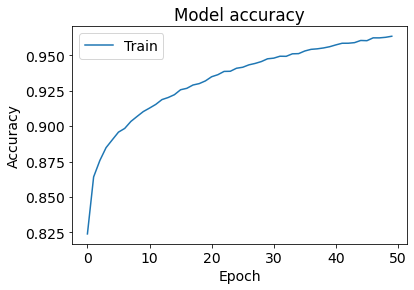

In [1322]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

### Model - 3

In [1323]:
model3 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dropout(0.01),
    keras.layers.Dense(10, activation='softmax')
])

In [1324]:
model3.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [1325]:
history = model3.fit(train_images, train_labels, verbose=1, epochs=50)
# validation_split=0.25, batch_size=16

Epoch 1/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4733 - accuracy: 0.8305
Epoch 2/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3600 - accuracy: 0.8687
Epoch 3/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3221 - accuracy: 0.8814
Epoch 4/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3008 - accuracy: 0.8873
Epoch 5/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2832 - accuracy: 0.8941
Epoch 6/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2674 - accuracy: 0.8999
Epoch 7/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2566 - accuracy: 0.9032
Epoch 8/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2430 - accuracy: 0.9095
Epoch 9/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2350 - accuracy: 0.9108
Epoch 10/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.22

In [1326]:
score3 = model3.evaluate(train_images, train_labels, verbose=0)

In [1327]:
print('Test loss:', score3[0])
print('Test accuracy:', score3[1])

Test loss: 0.06958937644958496
Test accuracy: 0.9740833044052124


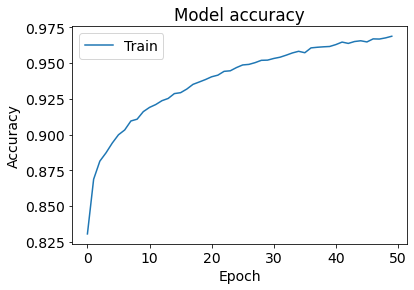

In [1328]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.show()

### Вывод:

На показатель точности модели существенно влияет параметр - epochs, который определяет сколько раз через нейросеть должен пройти весь набор данных, но возникает закономерный вопрос, не является ли это следствием переобучения? Так же на точность влияют настройки слоёв Dense и Dropout, последний при этом должен снижать вероятность переобучения. Перебор параметров bath_size, validation_split и некоторых других, снижали точность модели, пришлось оставить их по умолчанию. 